In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#how to perform EDA(Exploratory Data Analysis) on Telco-customer-churn dataset
data=pd.read_csv("Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#to show first five rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#in EDA first we do inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


so now we'll convert blanks with 0

In [7]:
#YOu cna see above TotalCharges column has object data type, because it has blanks data
data["TotalCharges"]=data["TotalCharges"].replace(" ",0)
#now we can convert datatype object to float
data["TotalCharges"]=data["TotalCharges"].astype("float")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


To check null values in data set

In [8]:
data.isnull().sum().sum()

np.int64(0)

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
#It will check duplication on the basis of entire rows
data.duplicated().sum()

np.int64(0)

In [11]:
#Jo cheez ap k data mein unique ho uss ki basis py bhi duplicate krna zarori hia
#so in this dataset customerID is unique.so we'll check duplication on the basis of customerID
#duplication on the basis of (Specific)vunique column
data.duplicated("customerID").sum()

np.int64(0)

In [13]:
# Define the function correctly
#converted 1 and 0 values with yes/no for better understanding
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

# Apply function to the column
data["SeniorCitizen"] = data["SeniorCitizen"].apply(conv)

In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


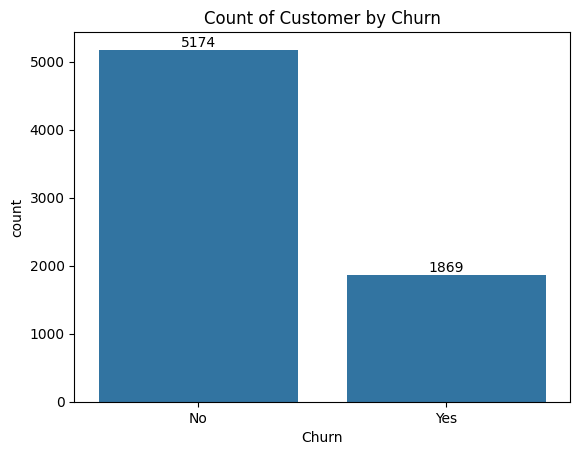

In [22]:
ax=sns.countplot(data=data, x="Churn")
#bar_label used to count 
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

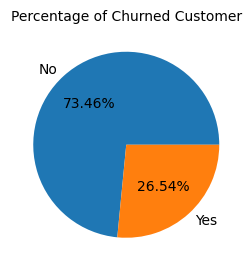

In [25]:
#Groupby the data on the basis of Churn
plt.figure(figsize=(3,4)) #we can fix figure size by width and height
gb=data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels=gb.index, autopct="%1.2f%%") #autopct used for auto percentage
plt.title("Percentage of Churned Customer",fontsize=10)
plt.show()
        

#We can see above 26.54% customers are churned out.
#now let's try to find out behind the reason

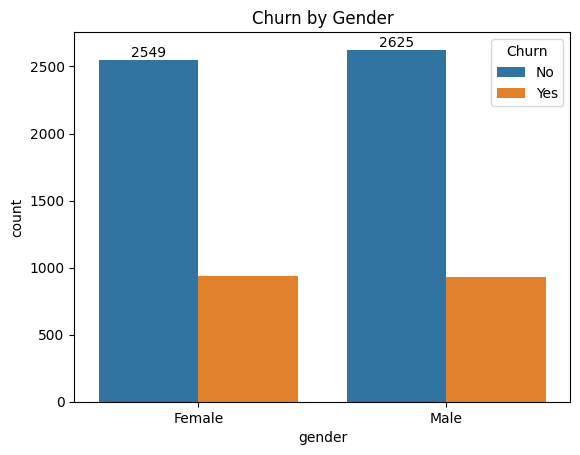

<Figure size 300x300 with 0 Axes>

In [36]:
ax=sns.countplot(data=data,x="gender",hue="Churn")
plt.title("Churn by Gender")
ax.bar_label(ax.containers[0])
plt.figure(figsize=(3,3))
plt.show()

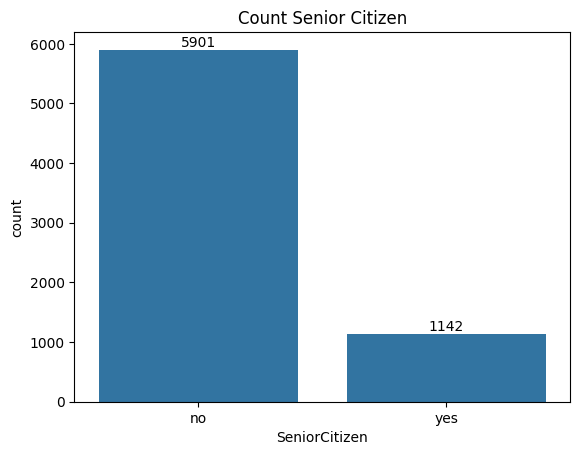

<Figure size 300x300 with 0 Axes>

In [45]:
ax=sns.countplot(data=data,x="SeniorCitizen")
plt.title("Count Senior Citizen")
ax.bar_label(ax.containers[0])
plt.figure(figsize=(3,3))
plt.show()

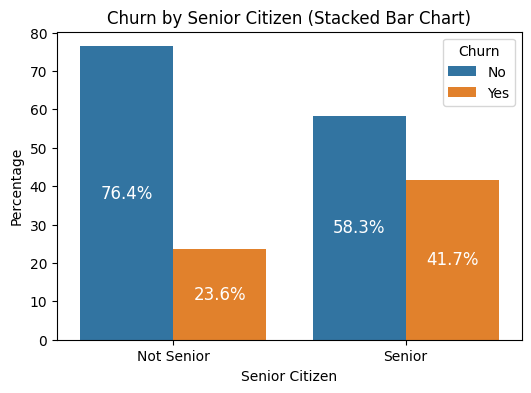

In [42]:

# Count occurrences
count_data = data.groupby(["SeniorCitizen", "Churn"]).size().reset_index(name="Count")

# Compute percentage per 'SeniorCitizen' category
total_per_senior_citizen = count_data.groupby("SeniorCitizen")["Count"].transform("sum")
count_data["Percentage"] = (count_data["Count"] / total_per_senior_citizen) * 100

# Plot stacked bar chart
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=count_data, x="SeniorCitizen", y="Percentage", hue="Churn", estimator=sum)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="white", fontsize=12)

# Formatting
plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=["Not Senior", "Senior"])
plt.legend(title="Churn")
plt.show()

#you can compare from above chart, that a great percentage of senior citizen category has churned

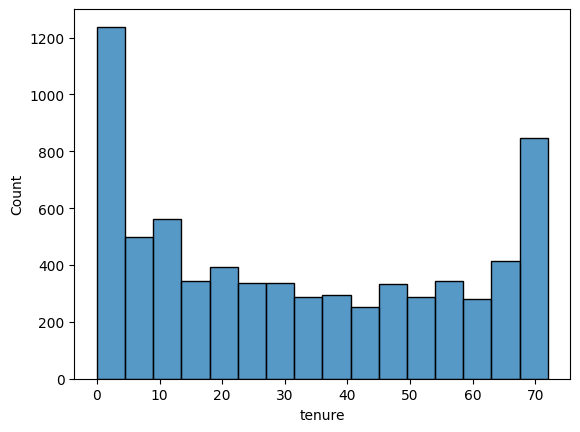

In [3]:
#Now we can check on the basis of Tenure
sns.histplot(data=data,x="tenure")
plt.show()

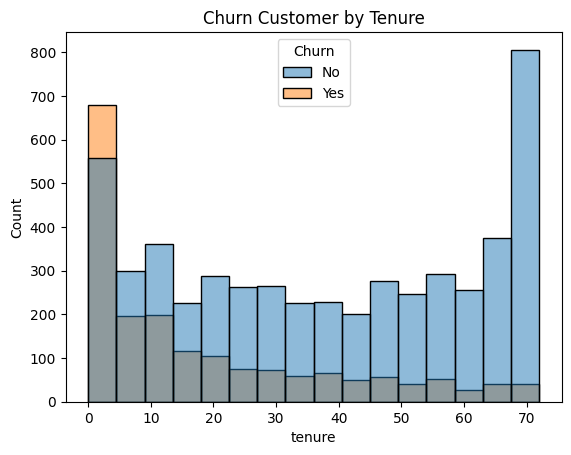

In [14]:
sns.histplot(data=data,x="tenure", hue="Churn") #hue used for filter
plt.title("Churn Customer by Tenure")
plt.show()

#People who have used our services for a long time have stayed and people who have used our services for a 1 or 2 months have churned

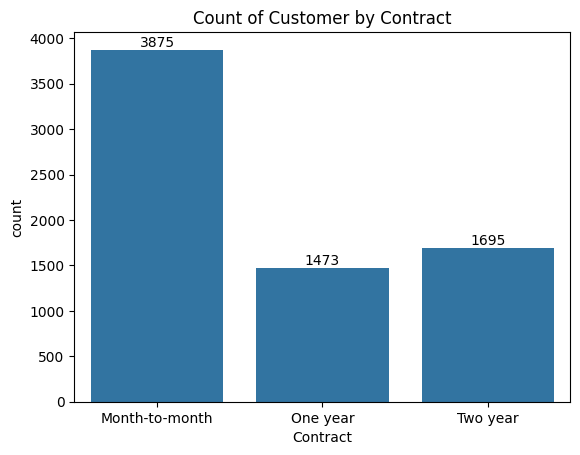

<Figure size 300x300 with 0 Axes>

In [6]:
ax=sns.countplot(data=data,x="Contract")
plt.title("Count of Customer by Contract")
ax.bar_label(ax.containers[0])
plt.figure(figsize=(3,3))
plt.show()

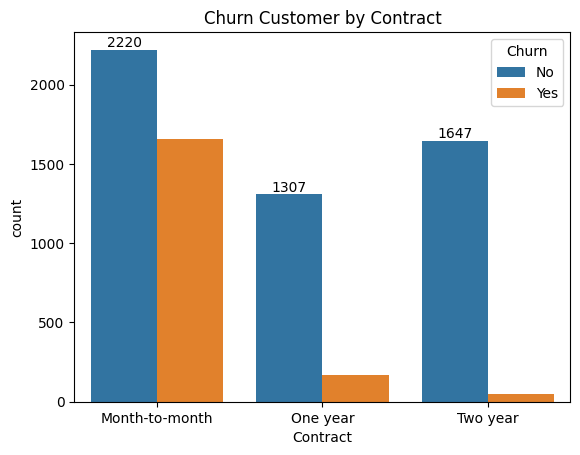

<Figure size 300x300 with 0 Axes>

In [13]:
ax=sns.countplot(data=data,x="Contract", hue="Churn")
plt.title("Churn Customer by Contract")
ax.bar_label(ax.containers[0])
plt.figure(figsize=(3,3))
plt.show()

#People who have month-to-month contract are likely to churn than from those who have one 1 or 2 years contract

In [9]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

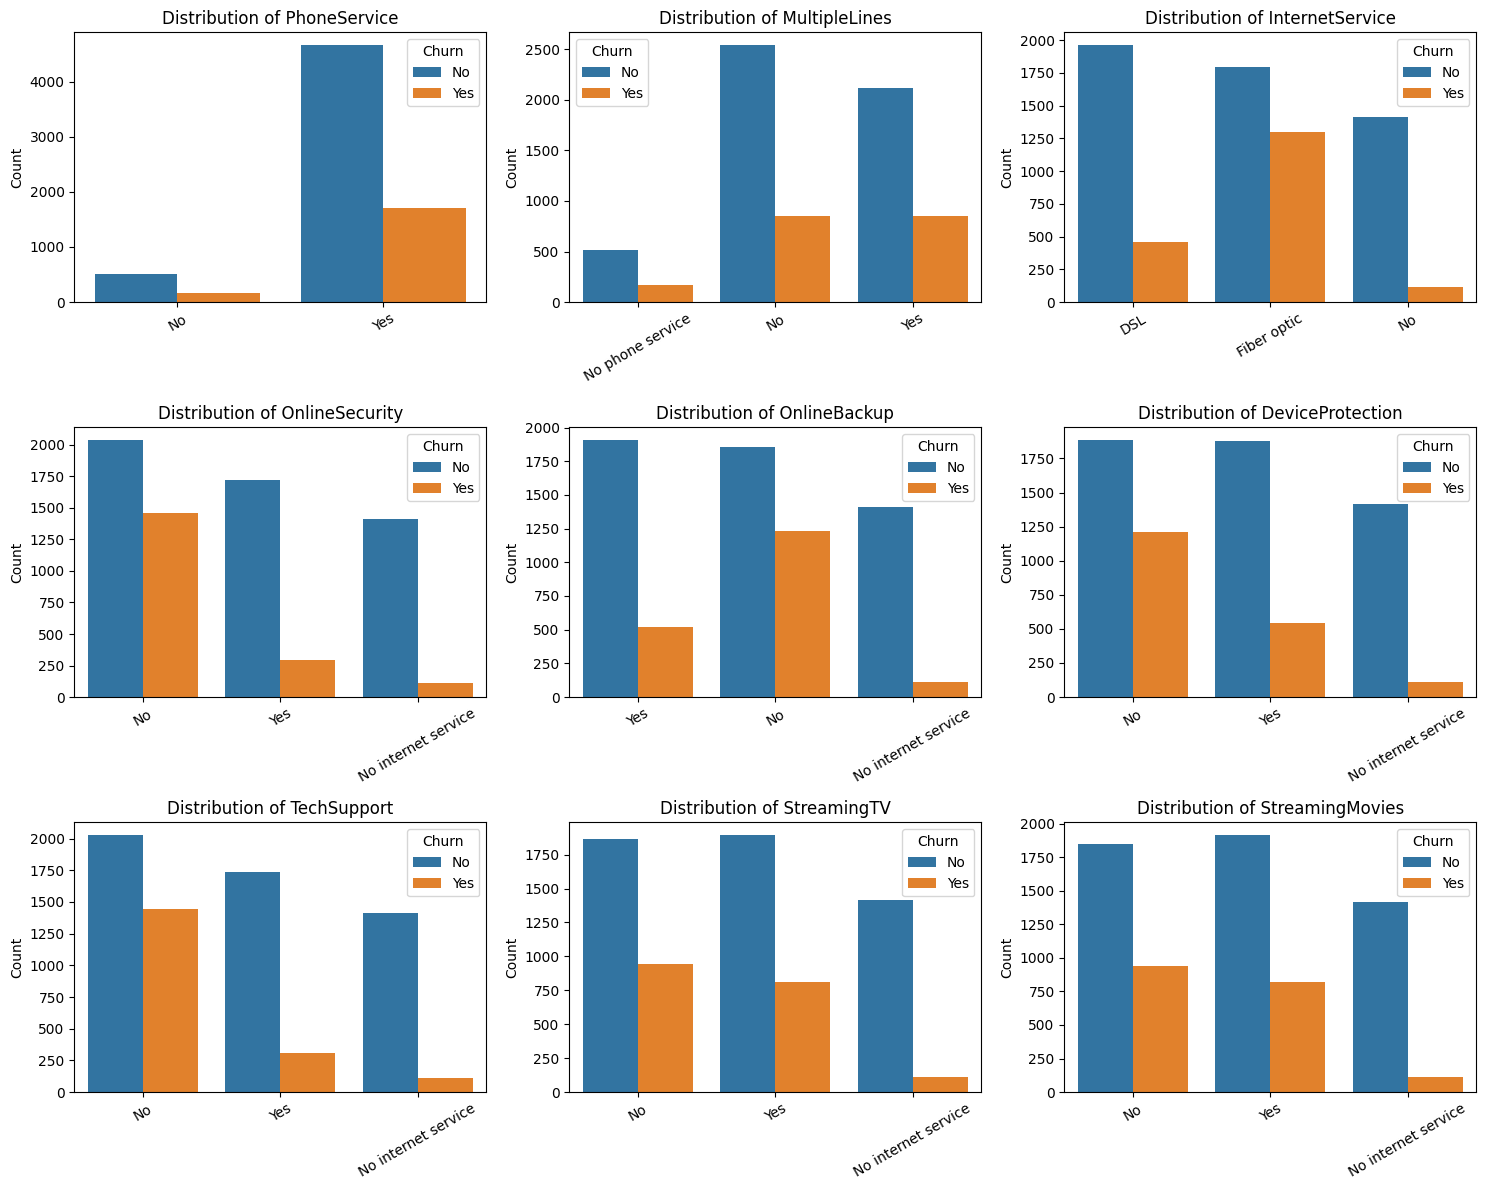

In [12]:
# Define columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots: subplot will plot multiple plot of countplot in one plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each column as a count plot
for i, col in enumerate(columns):
    sns.countplot(data=data, x=col, ax=axes[i], hue=data["Churn"])  # Removed `palette`
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()

#Phone & Internet Services – Most customers have phone and internet services, with churn rates higher for fiber optic users.
#Add-on Services (Security, Backup, Protection, Tech Support, Streaming) – Customers who did not subscribe to these services have a higher churn rate

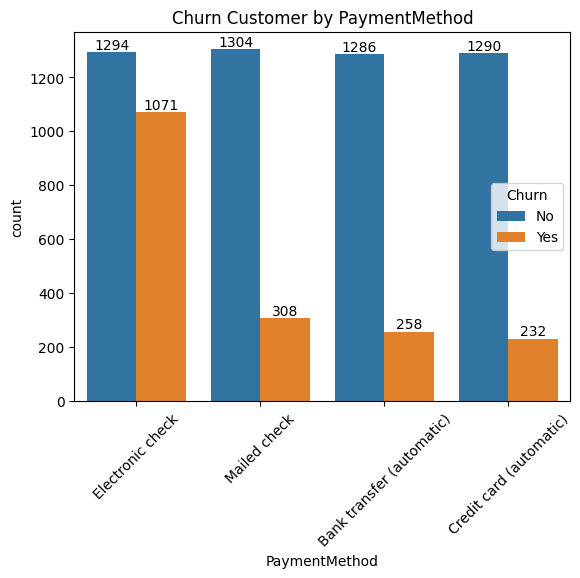

<Figure size 600x300 with 0 Axes>

In [19]:
ax=sns.countplot(data=data,x="PaymentMethod", hue="Churn")
plt.title("Churn Customer by PaymentMethod")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.figure(figsize=(6,3))
plt.show()

#Customers who use Electronic Check as a PaymentMethod are more churn